# EDA (Exploratory Data Analysis)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("../data/listings.csv")
print(f"Dataset with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset with 25000 rows and 79 columns.


In [17]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250914152907,2025-09-15,previous scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250914152907,2025-09-15,city scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,t,17,17,0,0,0.93
2,30959,https://www.airbnb.com/rooms/30959,20250914152907,2025-09-15,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250914152907,2025-09-15,city scrape,Apartasol Apartamentos Dana,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,130907,...,4.81,4.88,4.59,NaN,t,17,17,0,0,0.29
4,62423,https://www.airbnb.com/rooms/62423,20250914152907,2025-09-15,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.86,4.97,4.60,NaN,f,3,1,2,0,2.78


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25000 non-null  int64  
 1   listing_url                                   25000 non-null  object 
 2   scrape_id                                     25000 non-null  int64  
 3   last_scraped                                  25000 non-null  object 
 4   source                                        25000 non-null  object 
 5   name                                          25000 non-null  object 
 6   description                                   24130 non-null  object 
 7   neighborhood_overview                         10586 non-null  object 
 8   picture_url                                   24999 non-null  object 
 9   host_id                                       25000 non-null 

In [19]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### Description of Variables

🎯 **Target Variable**

* **`price`**: Nightly price for the listing. This is the continuous value we aim to predict (Regression). *(Note: Comes with a string with a '$' sign and needs to be converted to float).*

🗑️ **Features to Drop (Noise & Leakage)**

These columns are removed because they provide no predictive value, are unique identifiers, raw unstructured text, or metadata from the scraping process.

* **IDs & Scraping Data**: `id`, `scrape_id`, `last_scraped`, `source`, `host_id`, `calendar_updated`, `calendar_last_scraped`.

* **URLs (Web links)**: `listing_url`, `picture_url`, `host_url`, `host_thumbnail_url`, `host_picture_url`.

* **Raw Text (Without NLP)**: `name`, `description`, `neighborhood_overview`, `host_name`, `host_about`.

* **Redundant/Administrative**: `host_location`, `host_verifications`, `neighbourhood` *(we use `neighbourhood_cleansed` instead)*, `license`.

* **Highly correlated/Redundant availability/nights**: `minimum_minimum_nights`, `maximum_minimum_nights`, `minimum_maximum_nights`, `maximum_maximum_nights`, `minimum_nights_avg_ntm`, `maximum_nights_avg_ntm`.

🔠 **Categorical Features**

Variables that require transformation into numbers (One-Hot Encoding, Label Encoding) or specific feature engineering.

* **`neighbourhood_group_cleansed`**: District of the city (e.g., Centro, Chamberí).

* **`neighbourhood_cleansed`**: Specific neighborhood (e.g., Sol, Trafalgar).

* **`property_type`**: Specific type of property (e.g., Entire condo, Private room in house).

* **`room_type`**: Level of privacy (Entire home/apt, Private room, Shared room).

* **`host_response_time`**: How fast the host replies (within an hour, within a day).

* **`bathrooms_text`**: Number and type of bathrooms (e.g., "1.5 shared baths"). *(Needs text parsing to extract the number)*.

* **`amenities`**: JSON list of features (WiFi, AC, Pool). *(Needs to be exploded into boolean features like `has_ac`, `has_wifi`)*.

* **Booleans (True/False)**: `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `has_availability`, `instant_bookable`.

🔢 **Numerical Features**

**1. Continuous, Count and Spatial Variables:**

* **`latitude` / `longitude`**: Exact GPS coordinates. *(Crucial for spatial clustering and distance calculations)*.

* **`accommodates`**: Maximum number of guests the property can host.

* **`bedrooms`**: Number of bedrooms.

* **`beds`**: Number of beds available.

* **`bathrooms`**: Number of bathrooms *(Note: In recent Airbnb datasets this is often null, and we must use `bathrooms_text` instead)*.

* **`minimum_nights` / `maximum_nights`**: Booking rules set by the host.

* **`availability_30` / `60` / `90` / `365`**: Number of days available for booking in the future.

* **`number_of_reviews`**: Total reviews (Indicator of listing maturity/popularity).

* **`reviews_per_month`**: Average monthly reviews.

* **`calculated_host_listings_count`**: Total properties managed by the host (Identifies professional agencies vs. individuals).

* **Rates & Percentages**: `host_response_rate`, `host_acceptance_rate` *(Usually comes as strings like "95%", needs conversion to float).*

**2. Ordinal Variables (Review Scales):**

* **`review_scores_rating`**: Overall listing rating (Typically 1-5 or 0-100 scale).

* **`review_scores_accuracy`**: Score for listing accuracy.

* **`review_scores_cleanliness`**: Score for cleanliness.

* **`review_scores_checkin`**: Score for the check-in process.

* **`review_scores_communication`**: Score for host communication.

* **`review_scores_location`**: Score for the location.

* **`review_scores_value`**: Score for value for money.

**3. Dates (Require transformation to "Days since"):**

* **`host_since`**: Date the host joined Airbnb.

* **`first_review` / `last_review`**: Dates of reviews.

In [ ]:
TARGET = ['price']

COLUMNS_TO_DROP = [
    'id', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_location', 'host_about', 'host_listings_count',
    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
    'host_verifications', 'neighbourhood', 'calendar_updated', 
    'calendar_last_scraped', 'license', 'host_total_listings_count',
    'minimum_minimum_nights', 'maximum_minimum_nights', 
    'minimum_maximum_nights', 'maximum_maximum_nights', 
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
    'availability_eoy', 'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'bathrooms'
]

CATEGORICAL = [
    'neighbourhood_group_cleansed', 
    'neighbourhood_cleansed', 
    'room_type', 'property_type' # 66 categories include noise -> use room_type
    'host_response_time'
]

BOOLEAN = [
    'host_is_superhost', 
    'host_has_profile_pic', 
    'host_identity_verified', 
    'has_availability', 
    'instant_bookable'
]

NUMERICAL = [
    'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds',
    'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 
    'availability_90', 'availability_365', 'number_of_reviews', 
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 
    'reviews_per_month', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value'
]

NEEDS_PARSING = [
    'bathrooms_text',       # Ej: "1.5 shared baths" -> Extract the 1.5
    'amenities',            # Ej: ["Wifi", "AC"] -> Binary columns
    'host_response_rate',   # Ej: "95%" -> Eliminate '%'
    'host_acceptance_rate'  # Ej: "100%" -> Eliminate '%'
]

DATES = [
    'host_since', 
    'first_review', 
    'last_review'
]

LINKS = [
    'listing_url'
]

# Security check
assert len(TARGET + COLUMNS_TO_DROP + CATEGORICAL + BOOLEAN + NUMERICAL + NEEDS_PARSING + DATES + LINKS) == len(df.columns)

## Experimental Data Validation and Cleaning

In [21]:
# Drop columns
df_drop = df.drop(columns=COLUMNS_TO_DROP, axis=1)

print(f"Now, the dataset has {df_drop.shape[0]} rows and {df_drop.shape[1]} columns.")

Now, the dataset has 25000 rows and 45 columns.


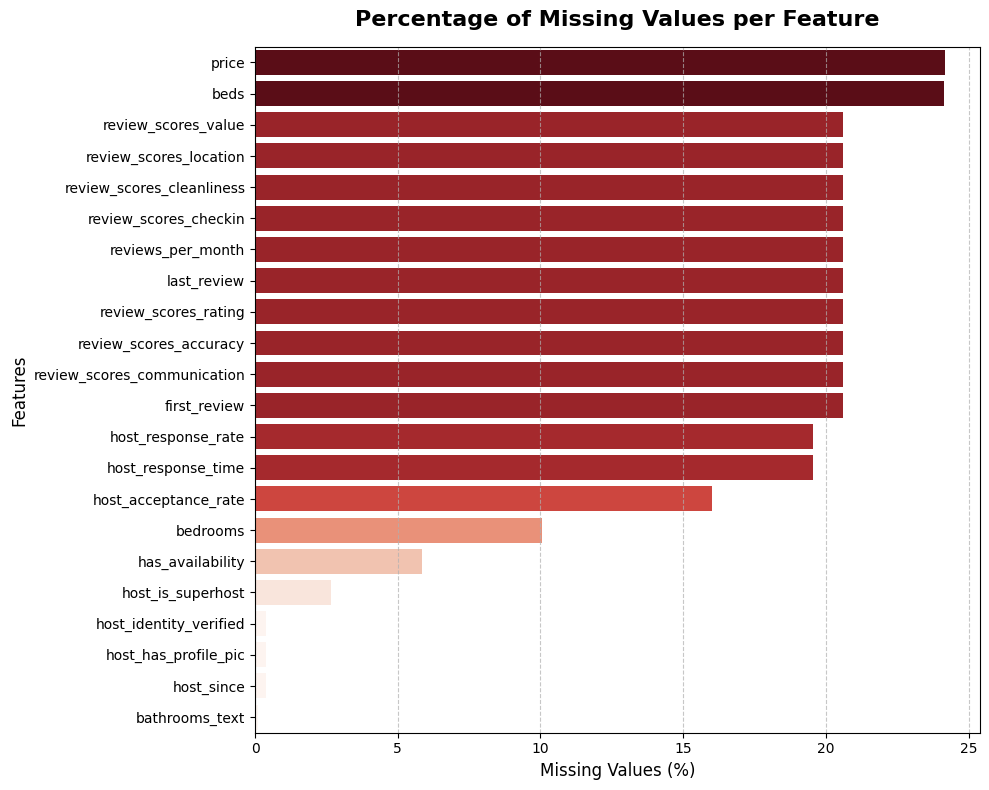

In [22]:
# Calculate the percentage of missing values and filter those greater than 0
missings = df_drop.isna().mean().sort_values(ascending=False)
missings = missings[missings > 0]

# 1. Set the figure size (width, height)
plt.figure(figsize=(10, 8))

# 2. Create a horizontal bar chart (x = values * 100 for %, y = column names)
sns.barplot(x=missings.values * 100, y=missings.index, palette="Reds", legend=False, hue=missings.values)

# 3. Add titles and labels (This completes your plt. setup)
plt.title("Percentage of Missing Values per Feature", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Missing Values (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)

# 4. Add a subtle x-axis grid to make the chart easier to read
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 5. Adjust layout and display the plot
plt.tight_layout() 
plt.show()

Let's break down exactly how we will handle each of these based on Machine Learning best practices:

**1. The Target Variable (`price`)**

If `price` is missing 25%, we have to be ruthless. In Supervised Learning, you **cannot** teach an algorithm to predict a price using examples that don't have a price.

* **Action:** We must drop the rows where `price` is missing.

<br>

**2. Property Features (`beds`, `bedrooms`)**

Losing 10% to 25% of our data just because the host forgot to fill in the number of beds is a terrible idea.

* **The "Why":** These missing values usually belong to studio apartments (0 or 1 bedroom) or are simply host typos.
* **Action:** We will **impute** (fill in) these missing values using **Grouped Imputation**. *For example, if there is a missing for beds of an apartment of 4 accomodates, we will impute this value with the median beds of houses with 4 accomodates.*

<br>

**3. The Review Scores (~20%)**

This is a very specific business case. Why would 20% of listings have no review scores? Because they are **new listings** or haven't been booked yet!

* **The "Why":** If we drop these rows, our model will never learn how to price newly published apartments.
* **Action:** We will put a -1 in these reviews and create a new dummy variable `has_reviews` (0/1), that indicates if that apartment is new.

<br>

**4. The Hosting Problem**
The variables `host_response_time`, `host_response_rate` and `host_acceptance_rate` have missings mainly because of a new host.

* **Action:** We will fill the missings of `host_response_time` with a cateogry "Unknown" and the others with a -1.


In [23]:
df_clean = df_drop.dropna(subset=["price"]).copy()

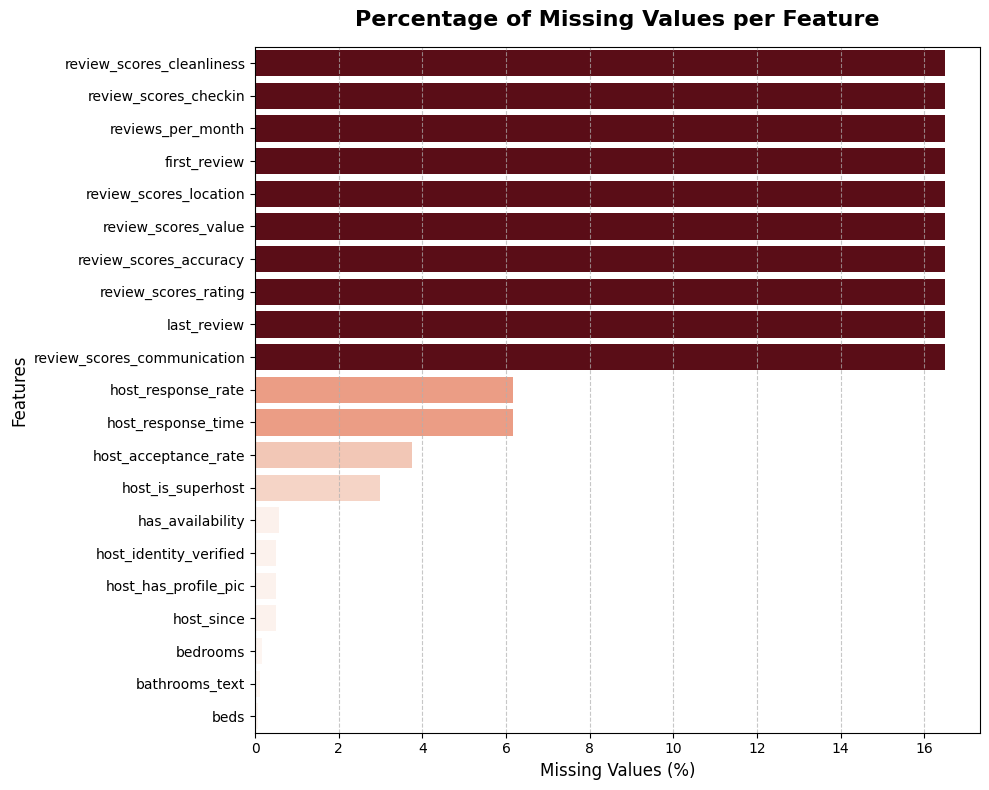

In [24]:
# Calculate the percentage of missing values and filter those greater than 0
missings = df_clean.isna().mean().sort_values(ascending=False)
missings = missings[missings > 0]

# 1. Set the figure size (width, height)
plt.figure(figsize=(10, 8))

# 2. Create a horizontal bar chart (x = values * 100 for %, y = column names)
sns.barplot(x=missings.values * 100, y=missings.index, palette="Reds", legend=False, hue=missings.values)

# 3. Add titles and labels (This completes your plt. setup)
plt.title("Percentage of Missing Values per Feature", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Missing Values (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)

# 4. Add a subtle x-axis grid to make the chart easier to read
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 5. Adjust layout and display the plot
plt.tight_layout() 
plt.show()

In [25]:
# Reviews cleaning
REVIEWS = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value', 'first_review', 
    'last_review', 'reviews_per_month'
]

df_clean["has_reviews"] = df_clean["reviews_per_month"].notna().astype(int)

for col in REVIEWS:
    df_clean[col] = df_clean[col].fillna(-1)


# Host cleaning
df_clean["host_response_time"] = df_clean["host_response_time"].fillna("Unknown")

for col in ["host_response_rate", "host_acceptance_rate"]:
    df_clean[col] = df_clean[col].fillna(-1)

df_clean

,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews
1,https://www.airbnb.com/rooms/30320,2010-05-24,within an hour,100%,100%,f,t,t,Sol,Centro,...,4.78,4.90,4.69,t,17,17,0,0,0.93,1
3,https://www.airbnb.com/rooms/40916,2010-05-24,within an hour,100%,100%,f,t,t,Universidad,Centro,...,4.81,4.88,4.59,t,17,17,0,0,0.29,1
4,https://www.airbnb.com/rooms/62423,2010-11-29,within an hour,100%,99%,f,t,t,Justicia,Centro,...,4.86,4.97,4.60,f,3,1,2,0,2.78,1
6,https://www.airbnb.com/rooms/70073,2011-01-19,within an hour,100%,100%,f,t,t,Universidad,Centro,...,4.40,4.60,4.09,f,4,4,0,0,0.21,1
7,https://www.airbnb.com/rooms/70310,2011-01-19,within an hour,100%,100%,f,t,t,Universidad,Centro,...,4.71,4.87,4.10,f,4,4,0,0,0.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,https://www.airbnb.com/rooms/1508016618526988093,2022-02-25,a few days or more,46%,20%,f,t,t,Pacífico,Retiro,...,-1.00,-1.00,-1.00,f,36,36,0,0,-1.00,0
24996,https://www.airbnb.com/rooms/1508029370917448986,2021-05-12,within an hour,100%,100%,f,t,t,Palacio,Centro,...,-1.00,-1.00,-1.00,t,1,1,0,0,-1.00,0
24997,https://www.airbnb.com/rooms/1508295390166110966,2018-12-28,within a few hours,90%,100%,f,t,t,Palacio,Centro,...,-1.00,-1.00,-1.00,t,2,2,0,0,-1.00,0
24998,https://www.airbnb.com/rooms/1508573408483646673,2018-10-19,within an hour,99%,100%,f,t,t,Ibiza,Retiro,...,-1.00,-1.00,-1.00,t,22,3,19,0,-1.00,0


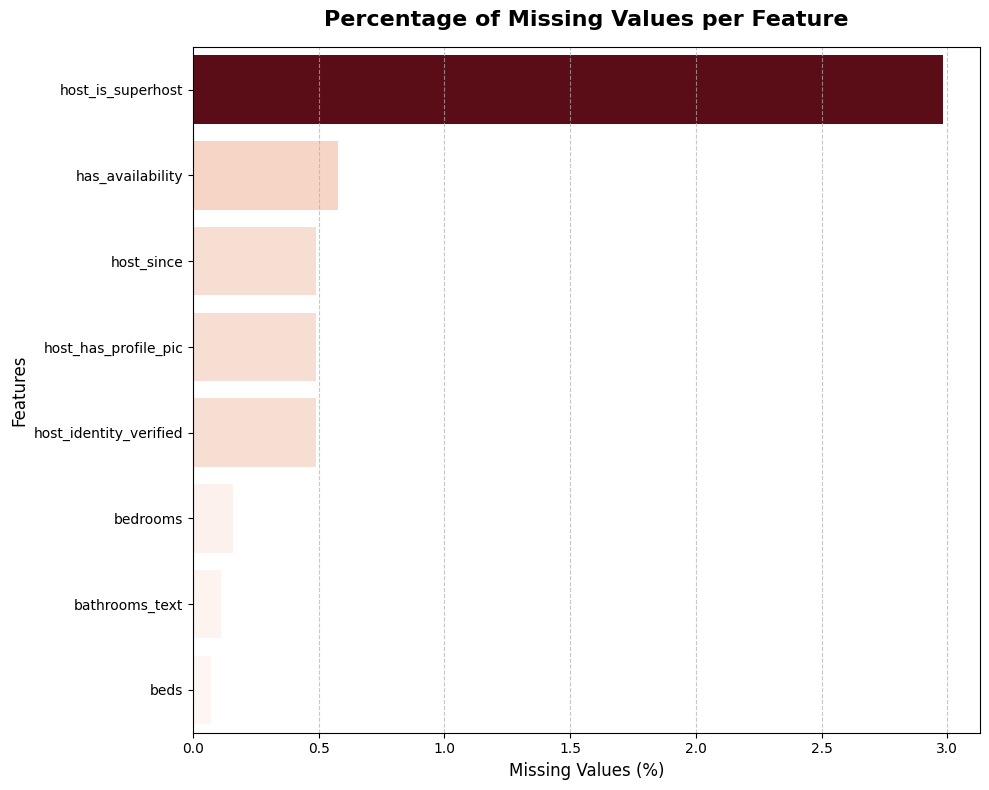

In [26]:
# Calculate the percentage of missing values and filter those greater than 0
missings = df_clean.isna().mean().sort_values(ascending=False)
missings = missings[missings > 0]

# 1. Set the figure size (width, height)
plt.figure(figsize=(10, 8))

# 2. Create a horizontal bar chart (x = values * 100 for %, y = column names)
sns.barplot(x=missings.values * 100, y=missings.index, palette="Reds", legend=False, hue=missings.values)

# 3. Add titles and labels (This completes your plt. setup)
plt.title("Percentage of Missing Values per Feature", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Missing Values (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)

# 4. Add a subtle x-axis grid to make the chart easier to read
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 5. Adjust layout and display the plot
plt.tight_layout() 
plt.show()

* The 0.49% of `host_since`, `profile_pic`, `identity_verified` are because the host has deleted his account on Airbnb or has been banned. We will drop these columns.

* `host_is_superhost` and `has_availability`. As they are boolean variables, if Airbnb does not mark them as Superhost or Has Availability, we will assume that they are not. (Fill those values with 0).

* `bedrooms`, `bathrooms` and `beds`. We will use the Grouped Imputation technique.

In [27]:
# Host ones
df_clean = df_clean.dropna(subset=["host_since", "host_has_profile_pic", "host_identity_verified"])

# Boolean
bool_ = ["host_is_superhost", "has_availability"]

for boo in bool_:
    df_clean[boo] = df_clean[boo].fillna("f")

# Characteristics

    # Transform bathrooms_text into float
df_clean["bathrooms"] = df_clean["bathrooms_text"].str.extract(r'(\d+\.?\d*)').astype(float)
df_clean = df_clean.drop("bathrooms_text", axis=1)


global_imp = ["bedrooms", "bathrooms", "beds"]

for col in global_imp:
    # Group Median
    df_clean[col] = df_clean[col].fillna(
        df_clean.groupby('accommodates')[col].transform('median')
    )
    
    # If some group did not have any value
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

/var/folders/kx/v0sncs2n15df2sfx78b0jv700000gn/T/ipykernel_88324/1602005215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[boo] = df_clean[boo].fillna("f")
/var/folders/kx/v0sncs2n15df2sfx78b0jv700000gn/T/ipykernel_88324/1602005215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["bathrooms"] = df_clean["bathrooms_text"].str.extract(r'(\d+\.?\d*)').astype(float)


## Data Validation and Cleaning (Backend)

Now, we will make a function with all the data cleaning done by us in order to clean the raw data from 0. It will be in `backend/preprocessing.py`

In [28]:
import sys
sys.path.append('../backend')
from preprocessing import clean_airbnb_data

df_clean = clean_airbnb_data(df)
df_clean.head()

,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,bathrooms,has_ac,has_pool,has_elevator,has_parking,distance_to_sol_km
1,https://www.airbnb.com/rooms/30320,2010-05-24,within an hour,100.0,100.0,0,1,1,Sol,Centro,...,0,0,0.93,1,1.0,1,0,1,0,0.229108
3,https://www.airbnb.com/rooms/40916,2010-05-24,within an hour,100.0,100.0,0,1,1,Universidad,Centro,...,0,0,0.29,1,1.0,1,0,1,0,0.652159
4,https://www.airbnb.com/rooms/62423,2010-11-29,within an hour,100.0,99.0,0,1,1,Justicia,Centro,...,2,0,2.78,1,1.5,1,0,0,0,0.654338
6,https://www.airbnb.com/rooms/70073,2011-01-19,within an hour,100.0,100.0,0,1,1,Universidad,Centro,...,0,0,0.21,1,1.0,1,0,0,1,0.645486
7,https://www.airbnb.com/rooms/70310,2011-01-19,within an hour,100.0,100.0,0,1,1,Universidad,Centro,...,0,0,0.18,1,1.0,1,0,0,1,0.645486


In [31]:
df_clean.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,bathrooms,has_ac,has_pool,has_elevator,has_parking,distance_to_sol_km
count,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,...,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000
mean,85.405885,82.395228,0.251113,0.953606,0.954560,40.422499,-3.694145,3.311877,1.382662,1.989873,...,5.811983,0.108537,1.520840,0.834411,1.316119,0.930912,0.046660,0.434146,0.397561,2.685591
std,30.159435,30.392649,0.433665,0.210343,0.208273,0.023389,0.027302,1.959145,0.934385,1.526427,...,25.470487,1.349770,2.176464,0.371721,0.700829,0.253610,0.210914,0.495657,0.489407,2.441690
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,40.331400,-3.832060,1.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006050
25%,90.000000,83.000000,0.000000,1.000000,1.000000,40.410146,-3.707408,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.190000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.776706
50%,100.000000,98.000000,0.000000,1.000000,1.000000,40.420708,-3.700949,3.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.858852
75%,100.000000,100.000000,1.000000,1.000000,1.000000,40.432357,-3.685118,4.000000,2.000000,2.000000,...,2.000000,0.000000,2.570000,1.000000,1.500000,1.000000,0.000000,1.000000,1.000000,3.995609
max,100.000000,100.000000,1.000000,1.000000,1.000000,40.535530,-3.545904,16.000000,25.000000,40.000000,...,212.000000,29.000000,51.260000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,14.496807


It looks like there are not inconsistencies. However, there are outliers, such as 16 accommodates or 40 beds or 25,654$ for one night.

In [32]:
print(f"There are these duplicated records: {int(df.duplicated().any())}")

There are these duplicated records: 0


### Key questions to resolve in EDA

* Which is the most expensive neighbourhoud?

* Being a "super-host" is related with better reviews or with more price per night?

* Which are the ammenities of the most expensive apartments?

* Which room type is more demanded? And the cheapest/most expensive? 

* Does the price drop as we move further away from the city center?

* Do professional agencies (host with multiple listings) charge more than individuals?

## Univariate Analysis

### Tarrget Analysis

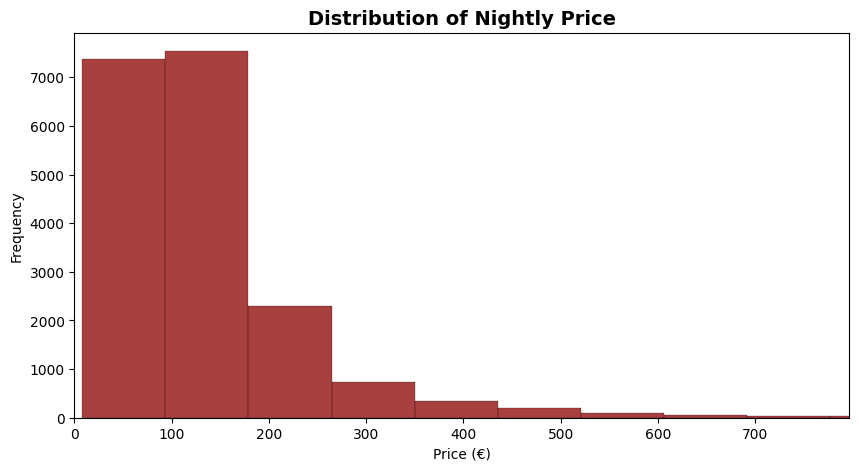

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price'], bins=300, color='darkred')
plt.title("Distribution of Nightly Price", fontsize=14, fontweight='bold')
plt.xlabel("Price (€)")
plt.ylabel("Frequency")
# Cut the long tail
plt.xlim(0, df_clean['price'].quantile(0.99)) 
plt.show()

As we can see, we have a lot of Airbnbs in the range from 7 to 200$ a night, and we have some rare "Premium" Airbnbs that charge more then 300$ for a night, even one that charges 25,654$ a night!

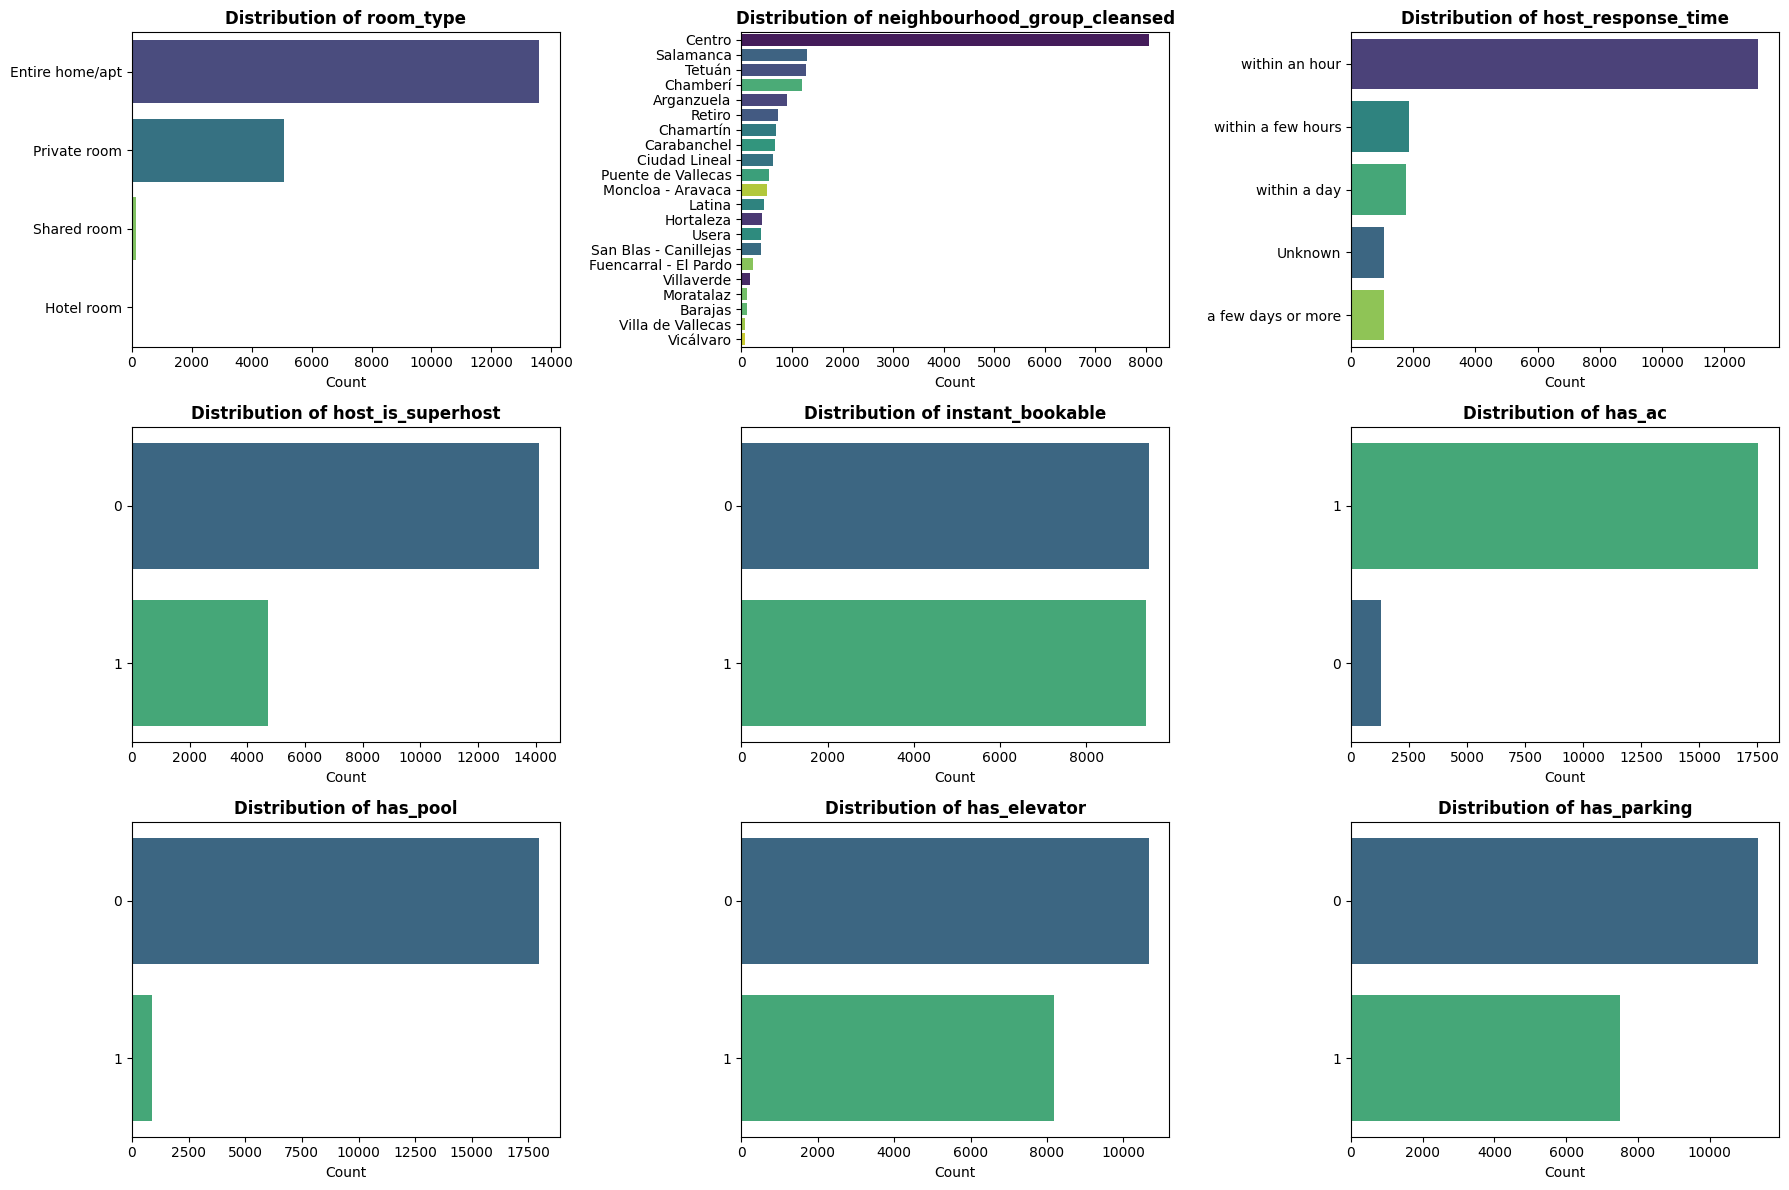

In [47]:
import math

# Categorical and bool
CATEGORICAL_FEATURES = [
    'room_type', 'neighbourhood_group_cleansed', 'host_response_time', 
    'host_is_superhost', 'instant_bookable', 'has_ac', 
    'has_pool', 'has_elevator', 'has_parking'
]

num_cols = 3 # 3 cols
num_rows = math.ceil(len(CATEGORICAL_FEATURES) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, cat in enumerate(CATEGORICAL_FEATURES):
    sns.countplot(
        y=cat, 
        data=df_clean, 
        hue=cat,       
        legend=False,  
        ax=axes[i], 
        order=df_clean[cat].value_counts().index, 
        palette="viridis"
    )
    
    axes[i].set_title(f"Distribution of {cat}", fontweight='bold')
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see here more or less the distribution of our dataset. There mostly entire homes or apartments, and there are also some private rooms. However, there are few shared rooms or hotel rooms.

Looking at the neighbourhood, we can see that "Centro" is the dominant one, followed by other centrical neighbourhoods such as Salamanca, Tetuán or Retiro.

It we see now the host characteristics, we see that they tend to be attentive hosts (respond within an hour most of them) and there are some "superhosts" that can affect the price (we will see).

Now, looking at the aparments, there are the same number that can be bookable instantly and those which not, most of them have air conditioning and do not have pool. Finally, there is a good portion of them with elevator or parking.

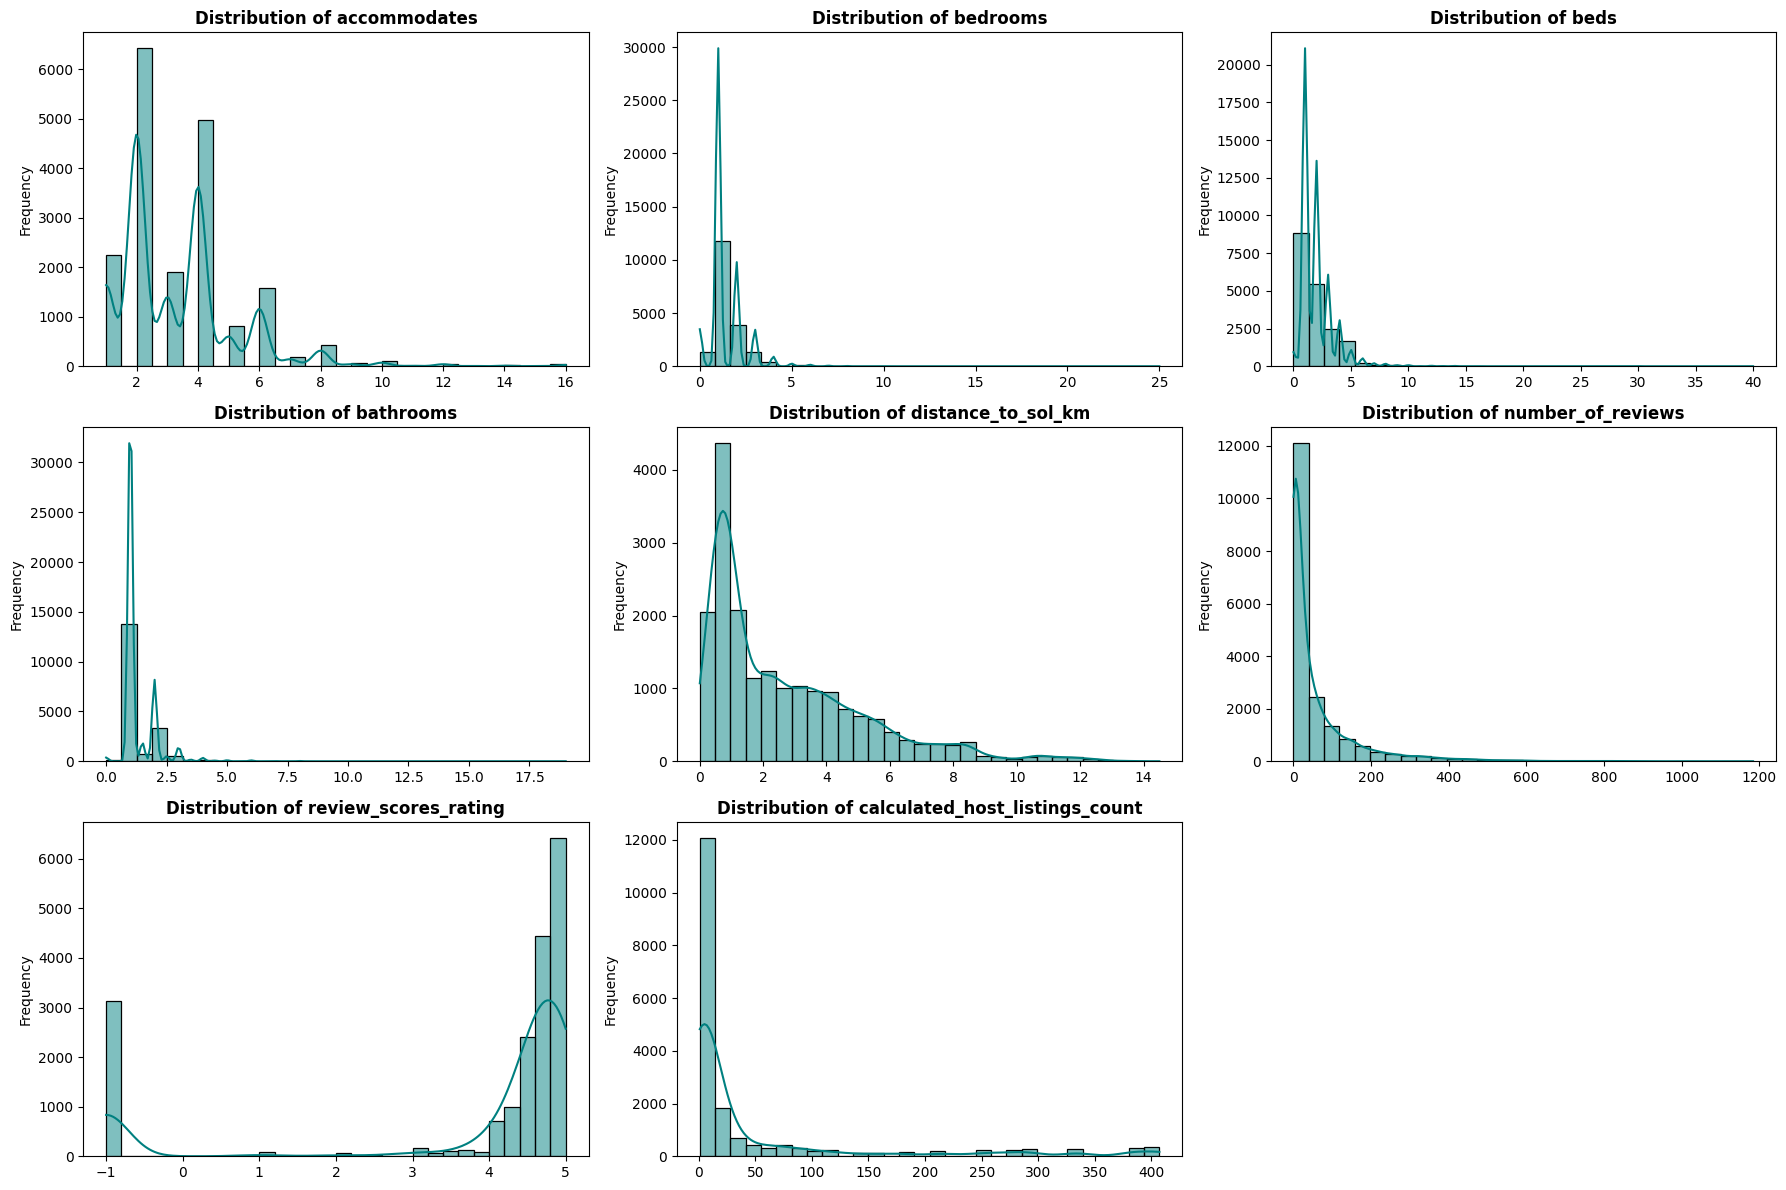

In [49]:
NUMERICAL_FEATURES = [
    'accommodates', 'bedrooms', 'beds', 'bathrooms', 
    'distance_to_sol_km', 'number_of_reviews', 
    'review_scores_rating', 'calculated_host_listings_count'
]

num_cols = 3
num_rows = math.ceil(len(NUMERICAL_FEATURES) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, num in enumerate(NUMERICAL_FEATURES):
    sns.histplot(
        x=num, 
        data=df_clean, 
        bins=30, 
        kde=True, # Añade la línea de suavizado
        ax=axes[i], 
        color="teal"
    )
    
    axes[i].set_title(f"Distribution of {num}", fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that there are apartments with accomodates from 1 to 8, more than that is pretty rare. Also, apartments with more than 5 bedrooms are strange and more than 6 or 7 beds the same. Bathrooms in these apartments tend to be less than 5.

If we take a look into distance to sol, we can see that is a right skewed distribution, as houses tend to be closer to the center. 

If we see reviews, number of reviews is highly right-skewed, having more than 400 reviews strange. And review scores rating is left-skewed, with a lot of reviews going from 4 to 5 stars.

Regarding host listings count, we have a lot of particulars, but we can see some entities with more than 300 listings.

## Bivariate Analysis

### Which is the most expensive neighbourhood?

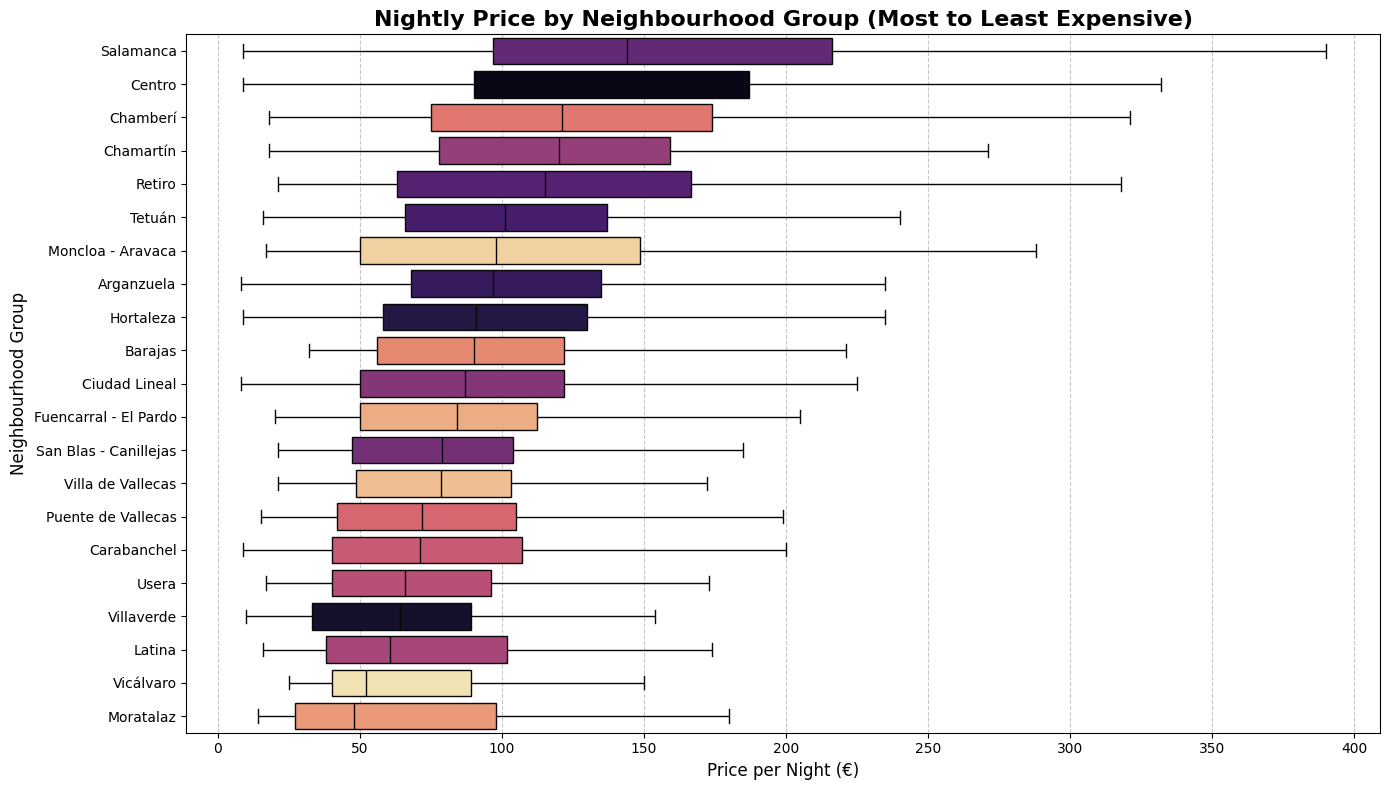

In [63]:
plt.figure(figsize=(14, 8))

# 1. Ordenar los barrios de más caro a más barato (por la mediana del precio)
orden_barrios = df_clean.groupby('neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False).index

# 2. Crear el Boxplot (¡Actualizado para Seaborn moderno!)
sns.boxplot(
    x='price', 
    y='neighbourhood_group_cleansed', 
    data=df_clean
, 
    hue='neighbourhood_group_cleansed', # <-- EL ARREGLO ESTÁ AQUÍ
    order=orden_barrios,
    palette='magma',
    showfliers=False,
    legend=False                        # <-- Y AQUÍ
)

# 3. Formatear el gráfico
plt.title("Nightly Price by Neighbourhood Group (Most to Least Expensive)", fontsize=16, fontweight='bold')
plt.xlabel("Price per Night (€)", fontsize=12)
plt.ylabel("Neighbourhood Group", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We can see that Salamanca is the most expensive Neighbourhood, followed closely by Centro and Chamberí. The cheapest ones are Moratalaz, Vicálvaro and Latina, that are peripherical neigbourhoods.

### Being a "super-host" is related with better reviews or with more price per night?

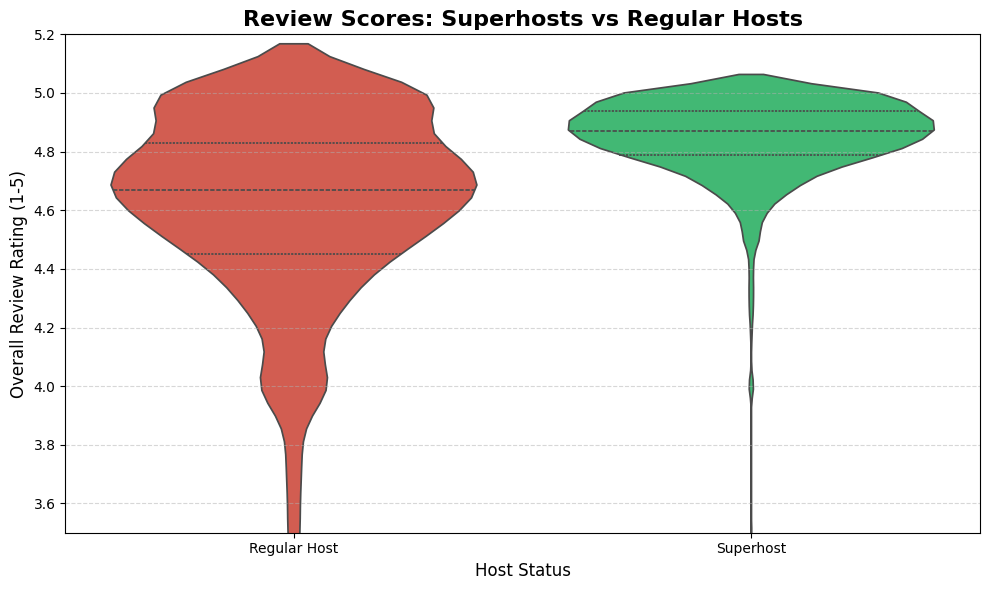

In [67]:
# 1. Filter out the listings without reviews (the -1 values we imputed)
df_reviews_only = df_clean[df_clean['review_scores_rating'] > 0].copy()

# 2. Map the 0/1 to readable labels just for the plot
df_reviews_only['host_type'] = df_reviews_only['host_is_superhost'].map({0: 'Regular Host', 1: 'Superhost'})

# 3. Create the figure
plt.figure(figsize=(10, 6))

# We use a Violinplot to see the "density" (where most of the scores are concentrated)
sns.violinplot(
    x='host_type', 
    y='review_scores_rating', 
    data=df_reviews_only, 
    hue='host_type',
    palette=['#e74c3c', '#2ecc71'], # Red for regular, Green for Superhost
    legend=False,
    inner='quartile' # Shows the median and quartiles inside the violin
)

# 4. Formatting
plt.title("Review Scores: Superhosts vs Regular Hosts", fontsize=16, fontweight='bold')
plt.xlabel("Host Status", fontsize=12)
plt.ylabel("Overall Review Rating (1-5)", fontsize=12)

# Zoom in on the top part of the ratings (since almost no one has below a 3)
plt.ylim(3.5, 5.2) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

As we can see, being a super host is related with having more positive reviews. This can be a good predictor of price? We will see.

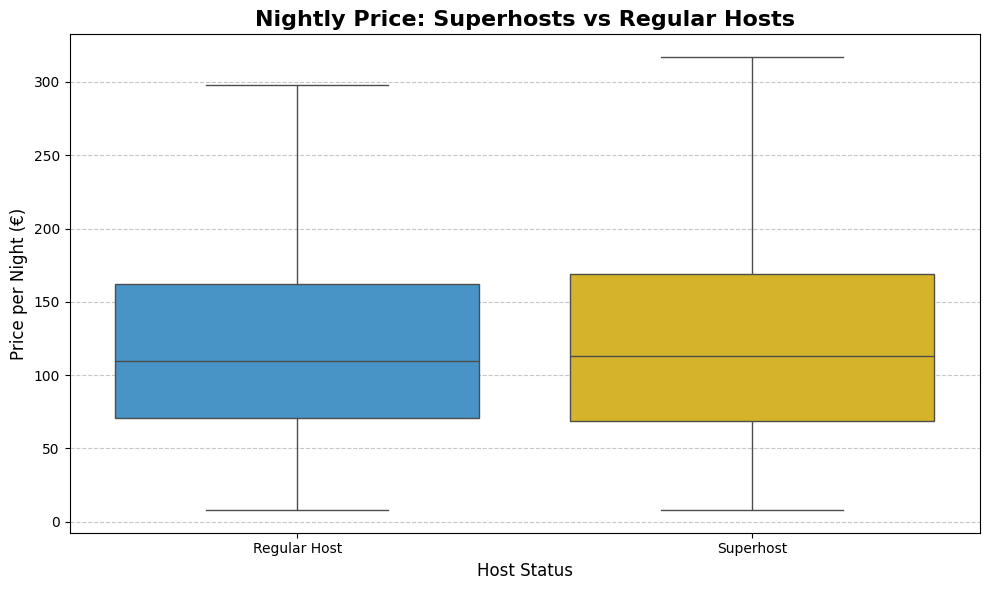

Mediana de precio por tipo de host:
host_type
Regular Host    110.0
Superhost       113.0
Name: price, dtype: float64


In [ ]:
# 1. Creamos una copia rápida para no ensuciar el dataset principal con textos
df_superhost_price = df_clean.copy()
df_superhost_price['host_type'] = df_superhost_price['host_is_superhost'].map({0: 'Regular Host', 1: 'Superhost'})

# 2. Preparamos el lienzo
plt.figure(figsize=(10, 6))

# 3. Creamos el Boxplot
sns.boxplot(
    x='host_type', 
    y='price', 
    data=df_superhost_price, 
    hue='host_type',
    palette=['#3498db', '#f1c40f'], # Azul para normales, Dorado para Superhosts
    legend=False,
    showfliers=False # Ocultamos los outliers extremos para ver bien dónde está la media real
)

# 4. Formato profesional
plt.title("Nightly Price: Superhosts vs Regular Hosts", fontsize=16, fontweight='bold')
plt.xlabel("Host Status", fontsize=12)
plt.ylabel("Price per Night (€)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 5. Calculamos la mediana exacta para tener el dato numérico
print("Median of price by host type:")
print(df_superhost_price.groupby('host_type')['price'].median())

As we can see, there is not much difference in price when being a superhost. Distributions are more or less the same and the medians are almost the same. Being a superhost is related with the reviews score, as we have seen before.

### Which are the ammenities of the most expensive apartments?

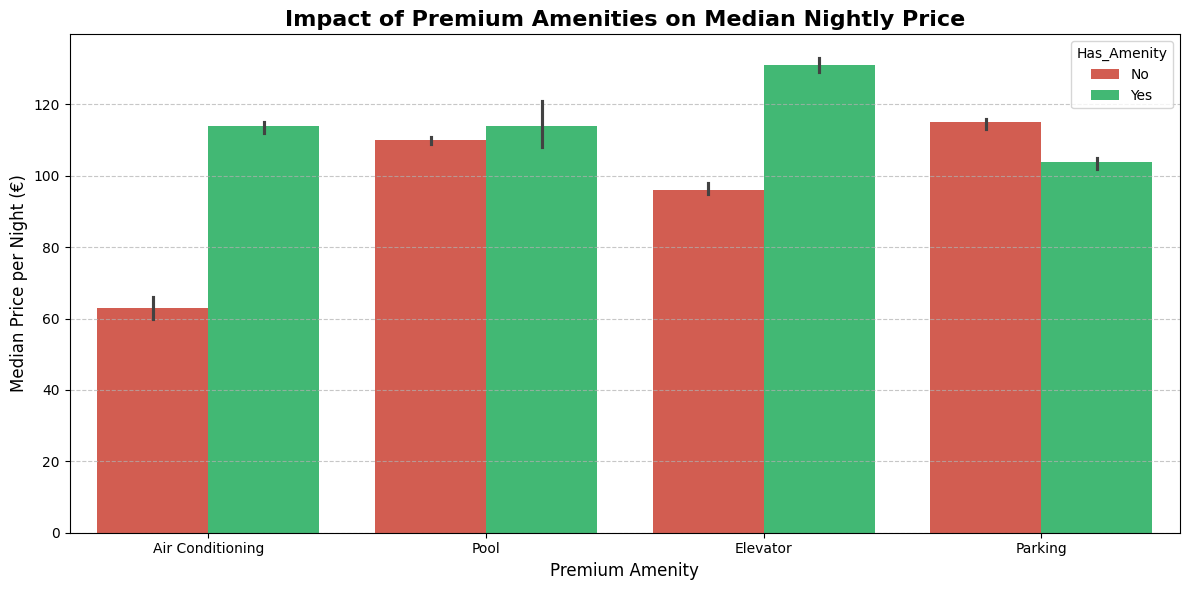

In [75]:
# 1. Define the premium amenities we extracted earlier
amenities = ['has_ac', 'has_pool', 'has_elevator', 'has_parking']

# 2. Use pd.melt to reshape the data for easy plotting
# This turns our 4 columns into two: 'Amenity' (the name) and 'Has_Amenity' (0 or 1)
df_amenities = df_clean.melt(
    id_vars=['price'], 
    value_vars=amenities, 
    var_name='Amenity', 
    value_name='Has_Amenity'
)

# 3. Map 0 and 1 to 'No' and 'Yes' for a cleaner legend
df_amenities['Has_Amenity'] = df_amenities['Has_Amenity'].map({0: 'No', 1: 'Yes'})

# 4. Create the grouped bar chart
plt.figure(figsize=(12, 6))

# We use estimator=np.median to avoid being skewed by 5000€ mansions
sns.barplot(
    x='Amenity', 
    y='price', 
    hue='Has_Amenity', 
    data=df_amenities, 
    estimator=np.median, 
    palette=['#e74c3c', '#2ecc71'], # Red for No, Green for Yes
    hue_order=['No', 'Yes']
)

# 5. Professional formatting
plt.title("Impact of Premium Amenities on Median Nightly Price", fontsize=16, fontweight='bold')
plt.xlabel("Premium Amenity", fontsize=12)
plt.ylabel("Median Price per Night (€)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Clean up the x-axis labels to look nicer
plt.xticks(ticks=[0, 1, 2, 3], labels=['Air Conditioning', 'Pool', 'Elevator', 'Parking'])

plt.tight_layout()
plt.show()

Here, we can see that prices are related with apartments with air conditioning and elevator. Having a pool or parking is not determinant to price.

Where are the apartments with air conditioning and elevator? In the center of Madrid in neighbourhoods such as Salamanca.

And the apartments with pool or big parkings? In the peripheral ones, where the price is lower.

> The pool is not raising the price, because the geography is "hiding" the real value.

### Which room type is more demanded? And the cheapest/most expensive? 

We had seen before that the room type more demanded was an entire home or apartment, followed by a private room. Those are the main markets in Airbnb in Madrid, with more competence.

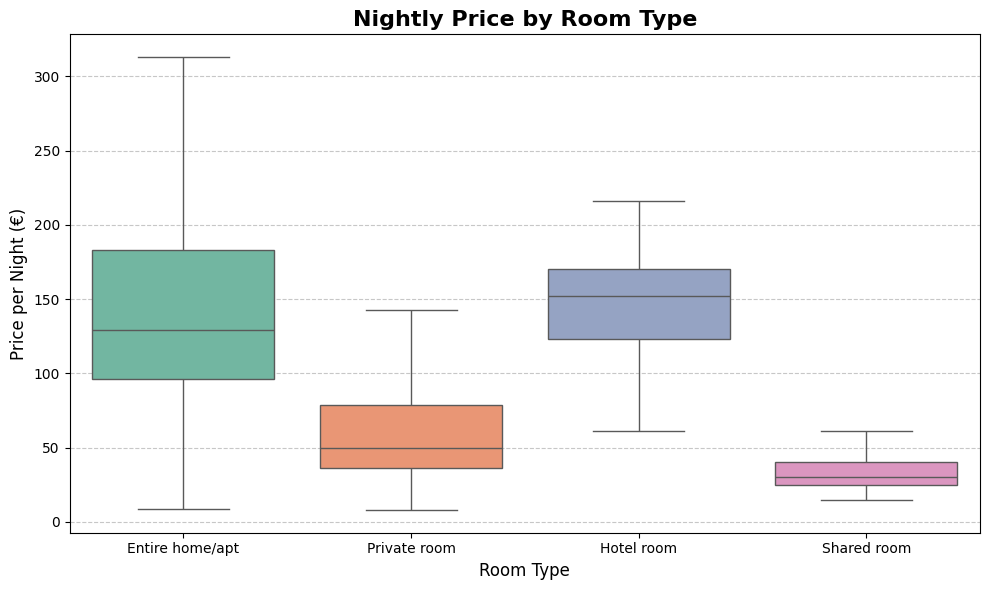

Median of price by room type:
room_type
Hotel room         152.0
Entire home/apt    129.0
Private room        50.0
Shared room         30.0
Name: price, dtype: float64


In [82]:
plt.figure(figsize=(10, 6))

# Creamos el Boxplot (ocultando los outliers extremos para ver bien las cajas)
sns.boxplot(
    x='room_type', 
    y='price', 
    data=df_clean, 
    hue='room_type',
    palette='Set2', 
    showfliers=False, # Clave para que el gráfico sea legible
    legend=False
)

# Formato profesional
plt.title("Nightly Price by Room Type", fontsize=16, fontweight='bold')
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price per Night (€)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Extra: Calculamos las medianas exactas para que las tengas en tus apuntes
print("Median of price by room type:")
print(df_clean.groupby('room_type')['price'].median().sort_values(ascending=False))

As wr can see, the most expensive ones are the entire home/apartments followed by hotels. But we have to take into account that we do not have a lot of hotels in our data, so this is quite interesting.

Private and shared rooms show the lowest price distribution, with a median lower than 50$ per night.

### Does the price drop as we move further away from the city center?

Correlation between Distance to Sol and Price: -0.053


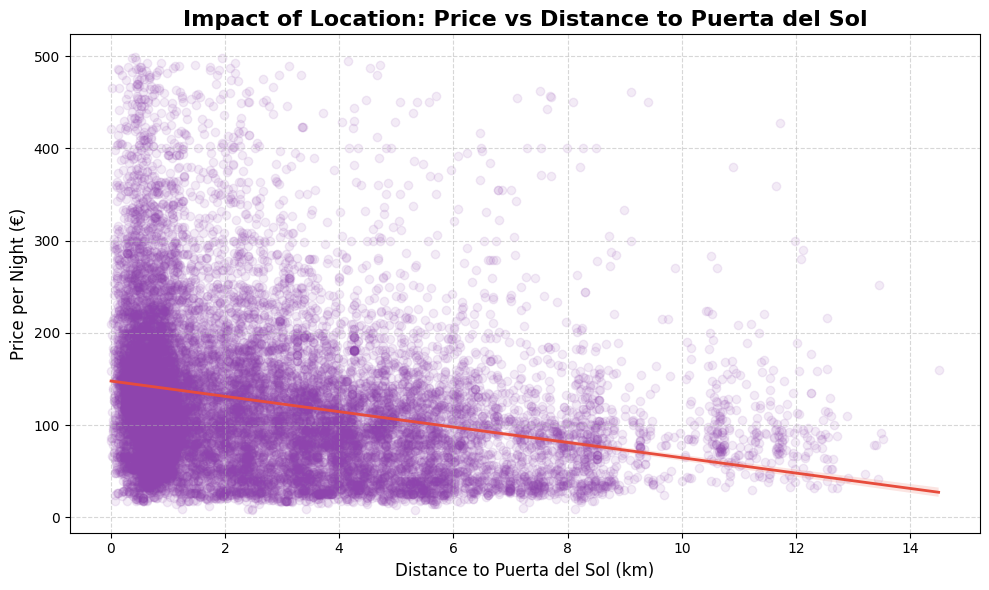

In [84]:
# 1. Calculamos la correlación de Pearson exacta
corr_dist = df_clean['distance_to_sol_km'].corr(df_clean['price'])
print(f"Correlation between Distance to Sol and Price: {corr_dist:.3f}")

# 2. Filtramos los precios extremos para ver clara la tendencia de la "masa" de pisos
df_dist = df_clean[df_clean['price'] < 500]

# 3. Creamos el gráfico
plt.figure(figsize=(10, 6))
sns.regplot(
    x='distance_to_sol_km', 
    y='price', 
    data=df_dist, 
    scatter_kws={'alpha': 0.1, 'color': '#8e44ad'}, # Mucha transparencia para ver la densidad
    line_kws={'color': '#e74c3c', 'linewidth': 2}   # Línea de tendencia en rojo
)

# 4. Formato
plt.title("Impact of Location: Price vs Distance to Puerta del Sol", fontsize=16, fontweight='bold')
plt.xlabel("Distance to Puerta del Sol (km)", fontsize=12)
plt.ylabel("Price per Night (€)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Even though the correlation is not a high absolute value, we can see that there is a relationship. While there are more apartments in the center, the concentration of houses in the peripheral is clearly in a lower zone of price per night.

We obviously see that pearson calculates a linear correlation, but this relation is not linear. Our future algorithm (such as XGBoost) could capture this non-linear relation pretty well.

### Do professional agencies (host with multiple listings) charge more than individuals?

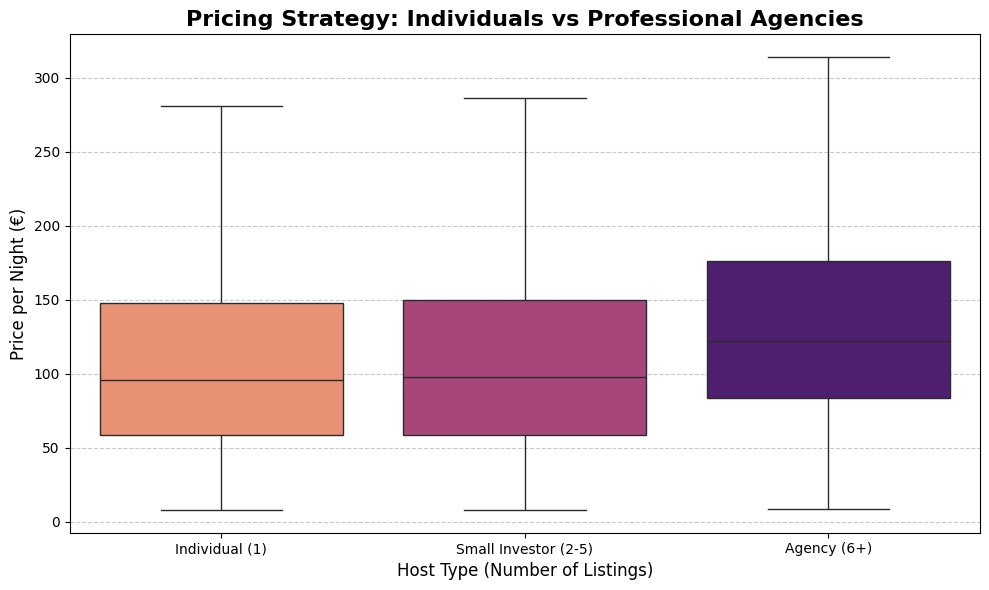

Price median by type of hoster
host_category
Individual (1)           96.0
Small Investor (2-5)     98.0
Agency (6+)             122.0
Name: price, dtype: float64


In [87]:
# 1. Creamos una función rápida para categorizar al anfitrión
def categorize_host(listings):
    if listings == 1:
        return 'Individual (1)'
    elif listings <= 5:
        return 'Small Investor (2-5)'
    else:
        return 'Agency (6+)'

# Aplicamos la función a una copia temporal para el gráfico
df_agencies = df_clean.copy()
df_agencies['host_category'] = df_agencies['calculated_host_listings_count'].apply(categorize_host)

# 2. Orden de las categorías para el gráfico
orden_categorias = ['Individual (1)', 'Small Investor (2-5)', 'Agency (6+)']

# 3. Creamos el Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='host_category', 
    y='price', 
    data=df_agencies, 
    order=orden_categorias,
    hue='host_category',
    palette='magma', 
    showfliers=False, # Sin outliers para ver las medianas reales
    legend=False
)

# 4. Formato
plt.title("Pricing Strategy: Individuals vs Professional Agencies", fontsize=16, fontweight='bold')
plt.xlabel("Host Type (Number of Listings)", fontsize=12)
plt.ylabel("Price per Night (€)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Extra: Printeamos las medianas exactas
print("Price median by type of hoster")
print(df_agencies.groupby('host_category')['price'].median().reindex(orden_categorias))

We can clearly see that Individuals and Small Investors have a similar median (~97$), but agencies clearly charge more for their houses (~122$).

## Final Veredict



After a comprehensive Exploratory Data Analysis (EDA) of the Airbnb listings in Madrid, we have uncovered the key drivers of nightly prices and market demand. Here are the main business insights that will guide our Machine Learning strategy:

### 1. Location is the Ultimate Premium

* **The Core:** *Salamanca*, *Centro*, and *Chamberí* dictate the highest prices in the city.
* **The Distance Decay:** There is a clear, non-linear drop in prices as we move away from the *Puerta del Sol* (city center). Properties in peripheral neighborhoods like *Moratalaz* or *Vicálvaro* operate in a completely different, lower-tier pricing bracket.
* *Modeling note:* Our engineered `distance_to_sol_km` feature will be crucial for the algorithm to understand geographic value without memorizing 130 neighborhood names.

### 2. The "Simpson's Paradox" of Amenities 

* Amenities like **Air Conditioning** and **Elevators** are strongly associated with higher prices because they are critical requirements for expensive, older buildings in the city center.
* Paradoxically, luxury features like **Pools** and massive **Parking** spaces don't show a higher global median price. This is because they are structurally restricted to the periphery, where the base price of real estate is already much lower.

### 3. The Superhost Myth vs. The Agency Reality

* **Superhosts:** Being a "Superhost" does *not* translate to higher nightly rates. Their strategy relies on volume, high rotation, and maintaining exceptional ratings, not on charging a premium.
* **Professional Agencies:** Hosts managing 6 or more listings (Agencies) charge a clear premium (~122€ vs ~97€ for individuals). They likely pass their operational costs (cleaning staff, software) directly to the guest, offering a more "hotel-like" standardized experience.

### 4. Privacy vs. Rotation (Demand)

* **Entire homes/apartments** dominate the revenue stream with the highest median prices, followed by hotels.
* On the other hand, **Private and Shared rooms** show lower prices (median < 50€/night) but Private rooms are the second segment more demanded in Airbnb, after Entire apartments.

### 🤖 Next Steps: Machine Learning Strategy

The Madrid Airbnb market is highly segmented and non-linear (e.g., the price drop from center to periphery isn't a straight line, and there are valid luxury outliers).

Therefore, simple linear regression won't be enough. We will move forward with **Tree-based algorithms (like Random Forest or XGBoost)**, which are perfectly suited to handle:

1. Skewed price distributions and luxury outliers.
2. Complex, non-linear geographical relationships.
3. Categorical features and boolean amenities.